# ASTRO 533 - Project 7

**Created:** Nov. 2020   
**Last Edit:** Nov. 2020  

**Author:** Bill Chen  
**Email:** ybchen@umich.edu  

## Load packages and read data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from astropy.table import Table as tb
import astropy.coordinates as coord
import astropy.units as u
from astropy.units import cds
import copy
plt.style.use('bill')

my_YlGnBu = copy.copy(mpl.cm.get_cmap('YlGnBu')) # copy the default cmap
my_YlGnBu.set_bad('w')

my_magma = copy.copy(mpl.cm.get_cmap('magma'))
my_magma.set_bad(my_magma(-1))

nyu_cat = tb.read('lowz_catalog.dr4.fits', format='fits')

## CMD

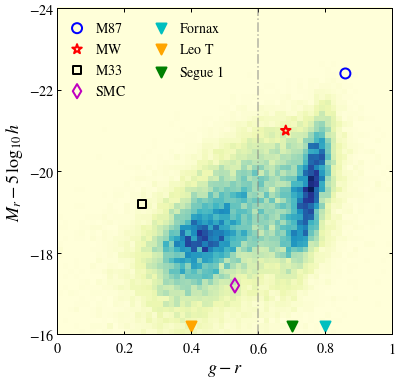

In [2]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist2d(nyu_cat['ABSMAG'][:,1]-nyu_cat['ABSMAG'][:,2], nyu_cat['ABSMAG'][:,2]-5*np.log10(1), range=[[0, 1], [-24, -16]],
          bins = 60, cmap=my_YlGnBu)
ax.axvline(0.6, c='gray', ls='-.', alpha=0.6)

ax.scatter(0.86, -22.4, marker='o', edgecolor='b', facecolor='', s=100, lw=2, label=r'$\rm M87$')
ax.scatter(0.682, -21, marker='*', edgecolor='r', facecolor='', s=100, lw=2, label=r'$\rm MW$')
ax.scatter(0.253, -19.2, marker='s', edgecolor='k', facecolor='', s=60, lw=2, label=r'$\rm M33$')
ax.scatter(0.53, -17.2, marker='d', edgecolor='m', facecolor='', s=100, lw=2, label=r'$\rm SMC$')
ax.scatter(0.8, -16.2, marker='v', c='c', s=100, lw=2, label=r'$\rm Fornax$')
ax.scatter(0.4, -16.2, marker='v', c='orange', s=100, lw=2, label=r'$\rm Leo\ T$')
ax.scatter(0.7, -16.2, marker='v', c='g', s=100, lw=2, label=r'$\rm Segue\ 1$')

ax.set_xlabel(r'$g-r$')
ax.set_ylabel(r'$M_r-5\,\log_{10}\,h$')
ax.set_xlim(0, 1)
ax.set_ylim(-16, -24)
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticklabels([r'$0$', r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$', r'$1$'])
ax.set_yticks([-16, -18, -20, -22, -24])
ax.set_yticklabels([r'$-16$', r'$-18$', r'$-20$', r'$-22$', r'$-24$'])
ax.legend(loc=2, ncol=2)

plt.savefig('./figures/cmd.pdf')
plt.show()

In [3]:
ind_1 = np.where(nyu_cat['SERSIC_N'][:,2] < 2)[0]
ind_2 = np.where(nyu_cat['SERSIC_N'][:,2] > 2)[0]

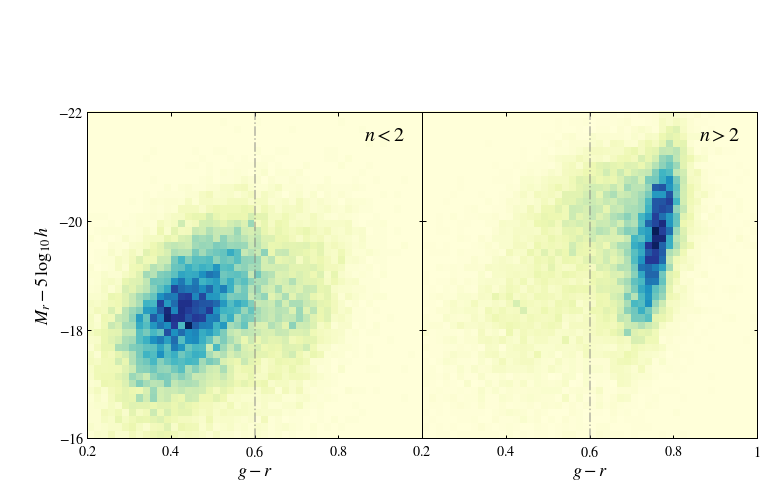

In [7]:
fig, [ax, ax2] = plt.subplots(1,2, figsize=(12,6), sharey=True)
fig.subplots_adjust(wspace=0)

ax.hist2d(nyu_cat['ABSMAG'][ind_1,1]-nyu_cat['ABSMAG'][ind_1,2], 
          nyu_cat['ABSMAG'][ind_1,2]-5*np.log10(1), range=[[0, 1], [-24, -16]],
          bins = 60, cmap=my_YlGnBu)
ax.axvline(0.6, c='gray', ls='-.', alpha=0.6)

ax2.hist2d(nyu_cat['ABSMAG'][ind_2,1]-nyu_cat['ABSMAG'][ind_2,2], 
          nyu_cat['ABSMAG'][ind_2,2]-5*np.log10(1), range=[[0, 1], [-24, -16]],
          bins = 60, cmap=my_YlGnBu)
ax2.axvline(0.6, c='gray', ls='-.', alpha=0.6)

ax.set_xlabel(r'$g-r$')
ax.set_ylabel(r'$M_r-5\,\log_{10}\,h$')
ax.set_xlim(0.2, 1)
ax.set_ylim(-16, -22)
ax.set_xticks([0.2, 0.4, 0.6, 0.8])
ax.set_xticklabels([r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$'])
ax.set_yticks([-16, -18, -20, -22])
ax.set_yticklabels([r'$-16$', r'$-18$', r'$-20$', r'$-22$'])

ax2.set_xlabel(r'$g-r$')
ax2.set_xlim(0.2, 1)
ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1])
ax2.set_xticklabels([r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$', r'$1$'])
ax.text(0.95, 0.96, r'$n<2$', transform=ax.transAxes, horizontalalignment='right', verticalalignment='top', fontsize=20)
ax2.text(0.95, 0.96, r'$n>2$', transform=ax2.transAxes, horizontalalignment='right', verticalalignment='top', fontsize=20)

plt.savefig('./figures/cmd2.pdf')
plt.show()